In [21]:
import pandas as pd
data = pd.read_csv("final_data2.csv")
data

,won_county,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,percent total population,percent total population male,percent total population female,percent total population under 5 years,percent total population 5 to 9 years,percent total population 10 to 14 years,...,percent hispanic or latino and total population not hispanic or latino american indian and alaska native alone,percent hispanic or latino and total population not hispanic or latino asian alone,percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone,percent hispanic or latino and total population not hispanic or latino some other race alone,percent hispanic or latino and total population not hispanic or latino two or more races,percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race,"percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races","percent citizen, voting age population citizen, 18 and over population","percent citizen, voting age population citizen, 18 and over population male","percent citizen, voting age population citizen, 18 and over population female"
0,0,0,0,0,57917,61.2,38.8,5.3,5.5,5.1,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
1,0,1278,2177,1295,57917,61.2,38.8,5.3,5.5,5.1,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
2,0,0,0,2,57917,61.2,38.8,5.3,5.5,5.1,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
3,0,2,4,0,57917,61.2,38.8,5.3,5.5,5.1,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
4,1,3801,4775,2622,57917,61.2,38.8,5.3,5.5,5.1,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884746,0,1278,2177,1295,77524,50.8,49.2,7.8,8.2,7.5,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884747,0,2,4,0,77524,50.8,49.2,7.8,8.2,7.5,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884748,0,0,0,2,77524,50.8,49.2,7.8,8.2,7.5,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884749,0,0,0,0,77524,50.8,49.2,7.8,8.2,7.5,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6


In [22]:
column_list = list(data.columns)

for column in column_list:
    print(column)

won_county
nyt headline mentions
nyt lead paragraph mentions
fox headline mentions
percent total population
percent total population male
percent total population female
percent total population under 5 years
percent total population 5 to 9 years
percent total population 10 to 14 years
percent total population 15 to 19 years
percent total population 20 to 24 years
percent total population 25 to 34 years
percent total population 35 to 44 years
percent total population 45 to 54 years
percent total population 55 to 59 years
percent total population 60 to 64 years
percent total population 65 to 74 years
percent total population 75 to 84 years
percent total population 85 years and over
percent total population under 18 years
percent total population 16 years and over
percent total population 18 years and over
percent total population 21 years and over
percent total population 62 years and over
percent total population 65 years and over
percent total population 18 years and over male
percent

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [24]:
column = ['won_county']
X = data.drop(columns=column)  
y = data['won_county']  # Target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(random_state=1)


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.08
R^2 Score: 0.68



Feature Importances:
fox headline mentions: 0.22405236804629566
percent citizen, voting age population citizen, 18 and over population male: 0.0729935237598658
percent total population one race asian vietnamese: 0.07243627466465359
percent total population two or more races white and american indian and alaska native: 0.05401698227991981
percent hispanic or latino and total population hispanic or latino (of any race) mexican: 0.0533547770551751
percent hispanic or latino and total population hispanic or latino (of any race) puerto rican: 0.03893567647398099
nyt headline mentions: 0.03784221837971295
nyt lead paragraph mentions: 0.027101588252141564
percent total population two or more races white and black or african american: 0.024680339632748034
percent hispanic or latino and total population not hispanic or latino two or more races: 0.024134064708462844
percent total population 65 years and over female: 0.023166806629424486
percent citizen, voting age population citizen, 18 and ove

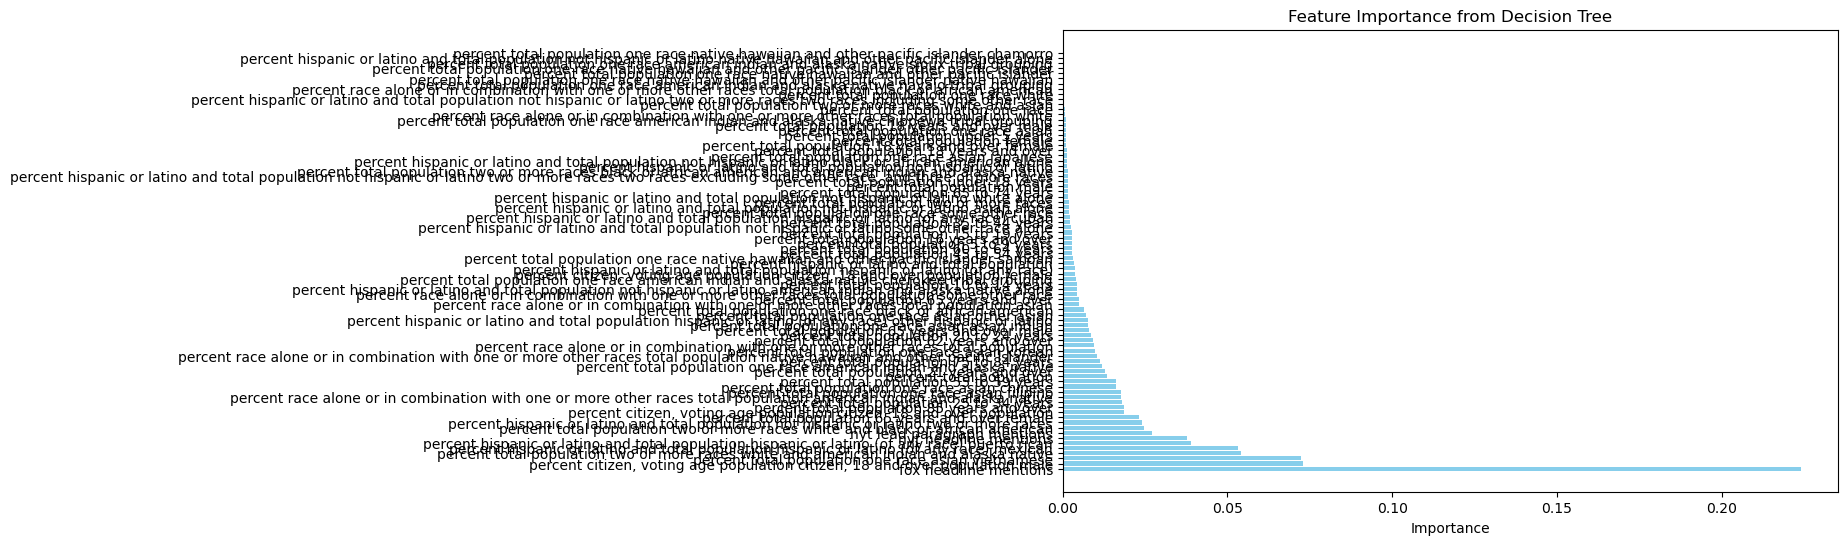

In [26]:

importance = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")




plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


Mean Squared Error: 0.08
R^2 Score: 0.68

Feature Importances:
fox headline mentions: 0.15277468350183135
nyt lead paragraph mentions: 0.10626311141955282
nyt headline mentions: 0.10145397815912843
percent citizen, voting age population citizen, 18 and over population male: 0.022251770404516
percent total population two or more races white and american indian and alaska native: 0.021359056620688256
percent citizen, voting age population citizen, 18 and over population female: 0.01886322733726088
percent total population: 0.01779028228157927
percent hispanic or latino and total population not hispanic or latino two or more races: 0.016568613463983563
percent race alone or in combination with one or more other races total population: 0.016214864433934724
percent hispanic or latino and total population: 0.015635404605144208
percent citizen, voting age population citizen, 18 and over population: 0.015025313145406376
percent total population female: 0.013416558328370113
percent hispanic or 

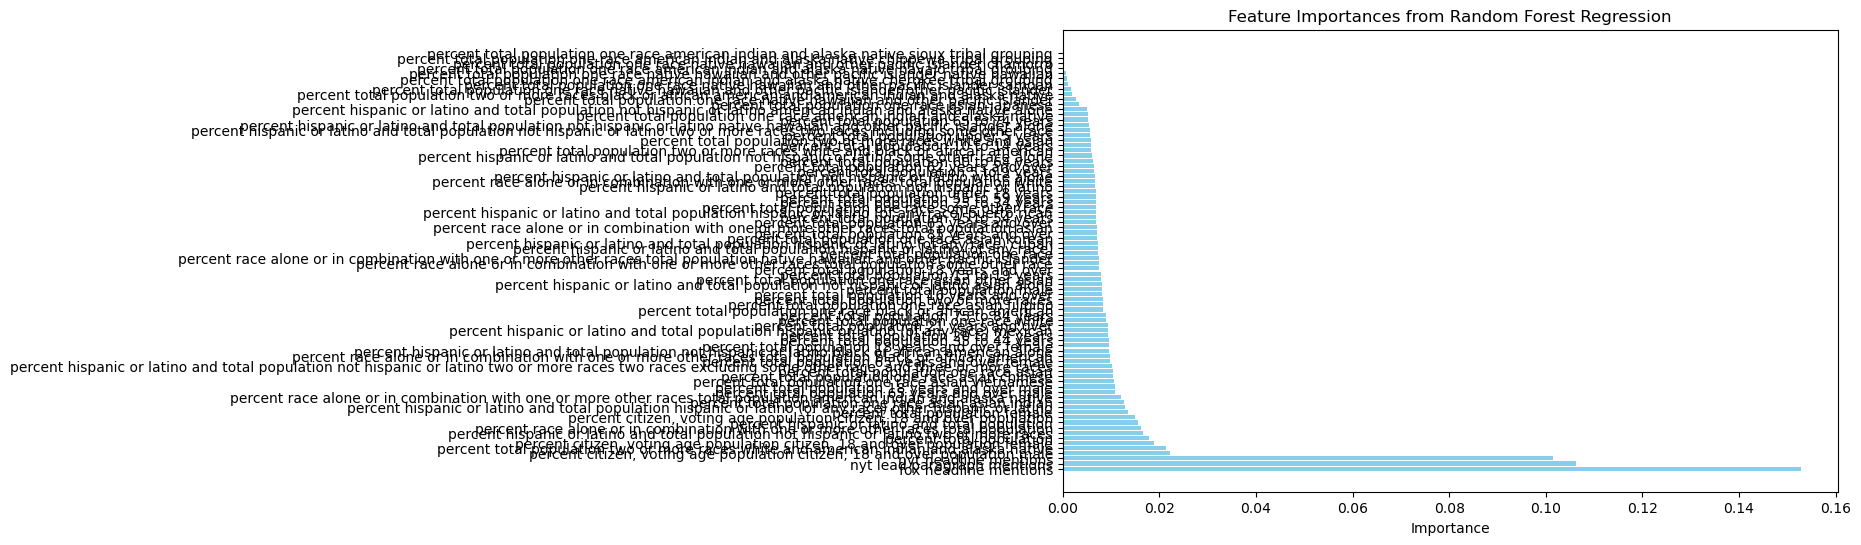

In [27]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score



model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  


print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Regression')
plt.show()


Mean Squared Error: 0.15
R^2 Score: 0.42

Feature Importances:
fox headline mentions: 0.15277468350183135
nyt lead paragraph mentions: 0.10626311141955282
nyt headline mentions: 0.10145397815912843
percent citizen, voting age population citizen, 18 and over population male: 0.022251770404516
percent total population two or more races white and american indian and alaska native: 0.021359056620688256
percent citizen, voting age population citizen, 18 and over population female: 0.01886322733726088
percent total population: 0.01779028228157927
percent hispanic or latino and total population not hispanic or latino two or more races: 0.016568613463983563
percent race alone or in combination with one or more other races total population: 0.016214864433934724
percent hispanic or latino and total population: 0.015635404605144208
percent citizen, voting age population citizen, 18 and over population: 0.015025313145406376
percent total population female: 0.013416558328370113
percent hispanic or 

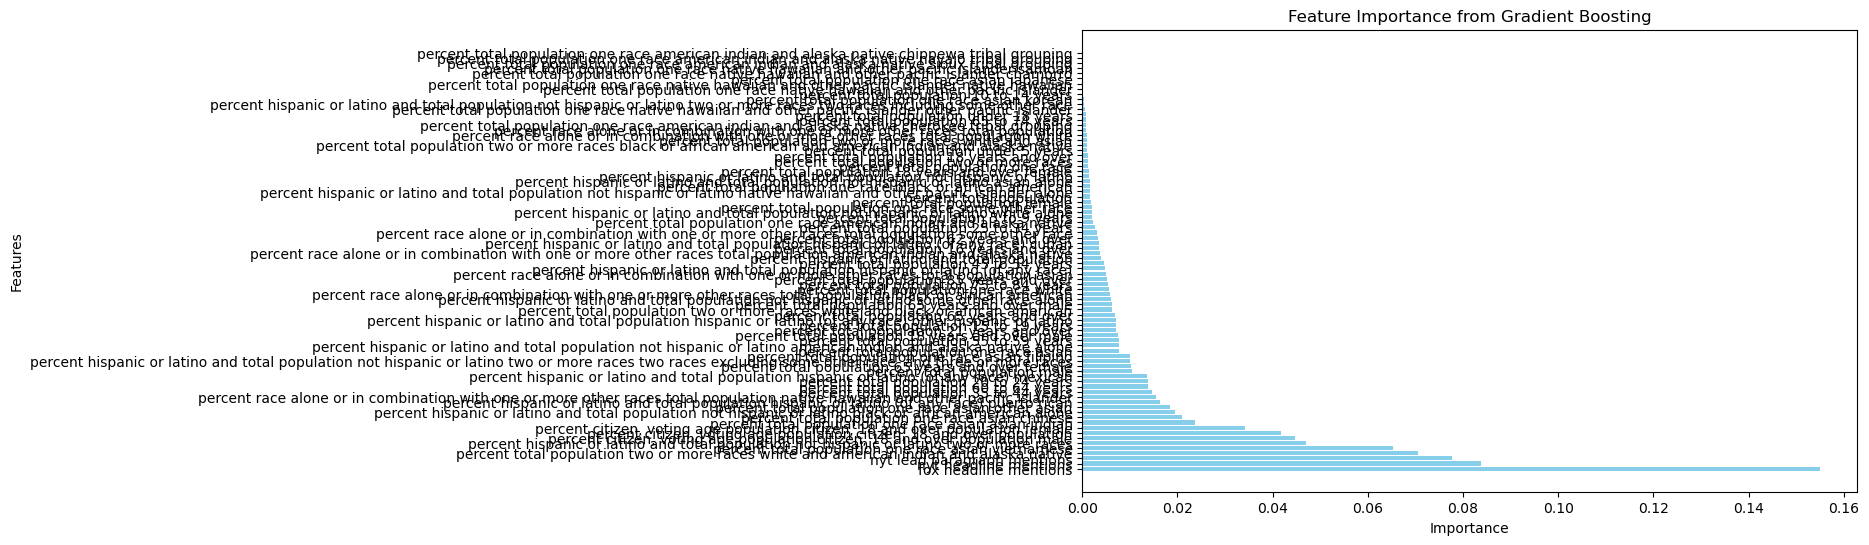

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error



model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)


y_pred = model2.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


importances = model2.feature_importances_


feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Gradient Boosting")
plt.barh(feature_importances.index, feature_importances["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[82504, 30213],
       [38093, 70378]])

Text(0.5, 427.9555555555555, 'Predicted label')

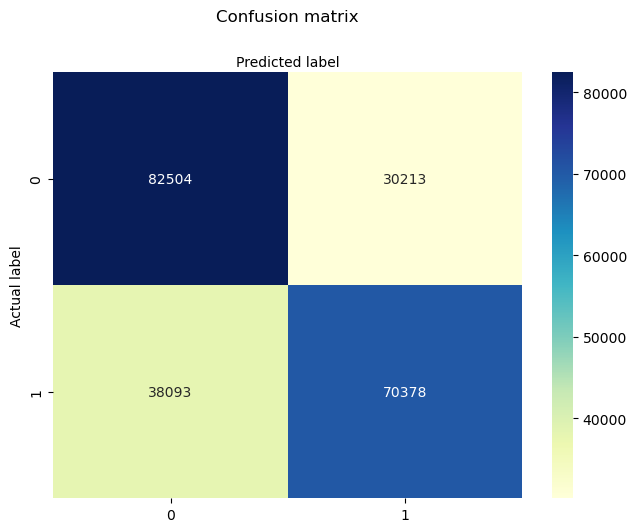

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [31]:
y_pred = logreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')





Mean Squared Error: 0.31
R^2 Score: -0.24


In [32]:

import numpy as np
importance = logreg.coef_[0]  # For binary classification
import pandas as pd

feature_names = X.columns  
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', key=np.abs, ascending=False)



Feature Importances:
fox headline mentions: 0.15277468350183135
nyt lead paragraph mentions: 0.10626311141955282
nyt headline mentions: 0.10145397815912843
percent citizen, voting age population citizen, 18 and over population male: 0.022251770404516
percent total population two or more races white and american indian and alaska native: 0.021359056620688256
percent citizen, voting age population citizen, 18 and over population female: 0.01886322733726088
percent total population: 0.01779028228157927
percent hispanic or latino and total population not hispanic or latino two or more races: 0.016568613463983563
percent race alone or in combination with one or more other races total population: 0.016214864433934724
percent hispanic or latino and total population: 0.015635404605144208
percent citizen, voting age population citizen, 18 and over population: 0.015025313145406376
percent total population female: 0.013416558328370113
percent hispanic or latino and total population hispanic or l

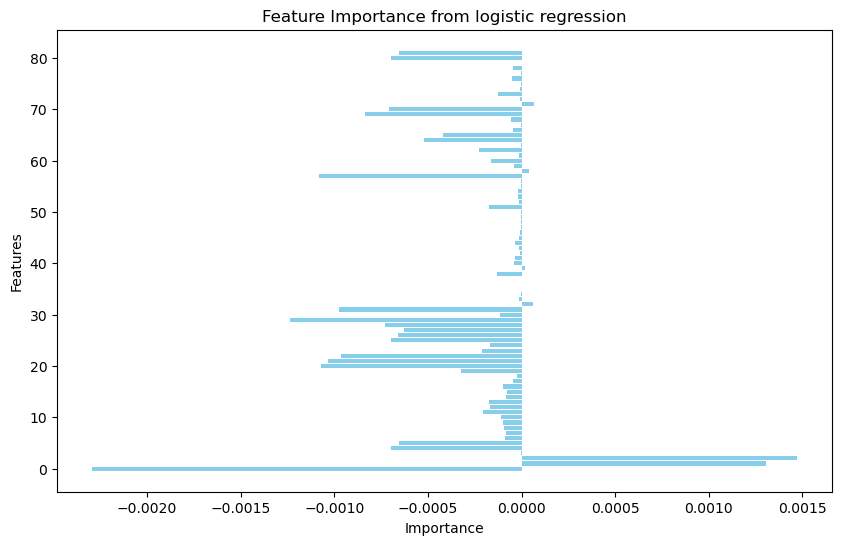

In [33]:
print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.title("Feature Importance from logistic regression")
plt.barh(importance_df.index, importance_df["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()